In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
#loading the data from sklearn
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
#convert to structured data
dataframe=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# append the label column
dataframe['label']=breast_cancer_dataset.target
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#summerize the data
print(dataframe.shape)
print(dataframe.info())
print(dataframe.describe())

(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

In [6]:
#checking the missing values
dataframe.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [7]:
#checking the distribution of target variable
dataframe['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [8]:
#segregatting the data
x=dataframe.drop(columns='label',axis=1)
y=dataframe['label']

In [9]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
# importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [12]:
#setting up layers of neural network
model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')])

In [13]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#trainig the neural network
history=model.fit(x_train,y_train,validation_split=0.2,epochs=10)

C:\Users\MATHEW HENRY\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10
12/12 [==============================] - 2s 61ms/step - loss: 0.4544 - accuracy: 0.8077 - val_loss: 0.3550 - val_accuracy: 0.8681
Epoch 2/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3302 - accuracy: 0.8791 - val_loss: 0.2695 - val_accuracy: 0.9121
Epoch 3/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2586 - accuracy: 0.9066 - val_loss: 0.2212 - val_accuracy: 0.9341
Epoch 4/10
12/12 [==============================] - 0s 13ms/step - loss: 0.2153 - accuracy: 0.9121 - val_loss: 0.1906 - val_accuracy: 0.9341
Epoch 5/10
12/12 [==============================] - 0s 12ms/step - loss: 0.1876 - accuracy: 0.9313 - val_loss: 0.1681 - val_accuracy: 0.9670
Epoch 6/10
12/12 [==============================] - 0s 12ms/step - loss: 0.1674 - accuracy: 0.9368 - val_loss: 0.1517 - val_accuracy: 0.9670
Epoch 7/10
12/12 [==============================] - 0s 14ms/step - loss: 0.1522 - accuracy: 0.9478 - val_loss: 0.1388 - val_accuracy: 0.9780
Epoch 8/10
12

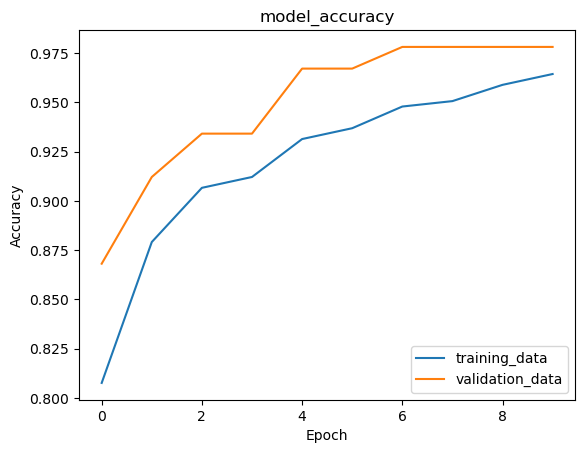

In [15]:
#visualizing the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['training_data','validation_data'],loc='lower right')
plt.show()

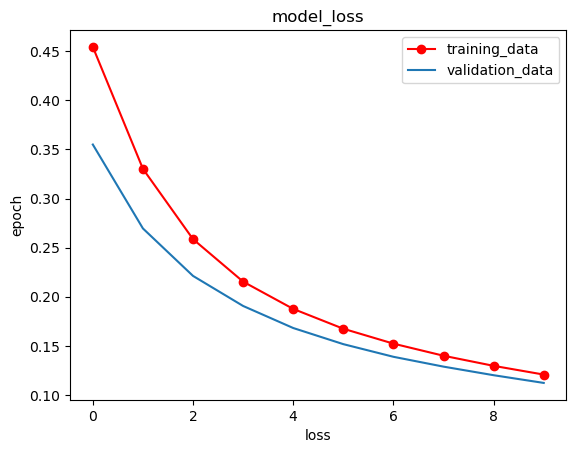

In [16]:
#visualizing the loss
plt.plot(history.history['loss'],color='r',marker='o')
plt.plot(history.history['val_loss'])

plt.title('model_loss')
plt.xlabel('loss')
plt.ylabel('epoch')

plt.legend(['training_data','validation_data'],loc='upper right')
plt.show()

In [17]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

4/4 [==============================] - 0s 5ms/step - loss: 0.1377 - accuracy: 0.9474
0.9473684430122375
0.13768932223320007


In [18]:
print(x_test.shape)

(114, 30)


In [19]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 5ms/step


In [20]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.36953613 0.4777611 ]


In [21]:
#converting the prediction probabbility to class label
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [22]:
#Building the predicyive system
data=[]
for i in range(1,31):
  input_data=float(input())
  data.append(input_data)
print(data)
con_arr=np.asarray(data)
reshap_data=con_arr.reshape(1,-1)
print(reshap_data)
data_std=sc.transform(reshap_data)
prediction=model.predict(data_std)
print(prediction)
prediction_label=np.argmax(prediction)
if prediction_label==0:
  print('the tumor is malignant')
else:
  print('The tumor is Benign')


4
5
6
6
7
8
9
8
7
6
5
4
3
2
1
2
4
5
6
7
8
9
5
4
5
2
3
6
4
3
[4.0, 5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 5.0, 4.0, 5.0, 2.0, 3.0, 6.0, 4.0, 3.0]
[[4. 5. 6. 6. 7. 8. 9. 8. 7. 6. 5. 4. 3. 2. 1. 2. 4. 5. 6. 7. 8. 9. 5. 4.
  5. 2. 3. 6. 4. 3.]]
1/1 [==============================] - 0s 56ms/step
[[0. 1.]]
The tumor is Benign


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
